# Clustering
Unsupervised machine learning.

Links
* [Tutorial](https://matteucci.faculty.polimi.it/Clustering/tutorial_html/index.html) from Italy
* [sklearn](https://scikit-learn.org/stable/modules/clustering.html) index of all algorithms
* [sklearn](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html) comparison on toy datasets

In [1]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

In [2]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

In [3]:
COLORS = np.array([
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00"
])

## Hierarchical clustering
Agglomerative = bottom-up. Scales well. Works with any distance, even non-Euclidean. Can choose #clusters interactively.  

Clustering metrics: single-linkage clustering (min), complete-linkage clustering (max), average-linkage clustering. Ward uses centroids and SSE; it is similar to ANOVA and to the K-means objective function in that it minimizes intra vs inter group variance.

See: [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) AgglomerativeClustering. Can set goal by #clusters or distance threshold. Attributes include #clusters, #leaves, #features used, and #connected components.    
See also: [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.FeatureAgglomeration.html#sklearn.cluster.FeatureAgglomeration) FeatureAgglomeration can cluster features for dimensionality reduction.

#clusters 2
cluster assignments per point [1 1 1 0 0 0]


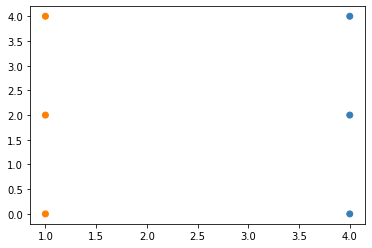

In [7]:
# Simple example from docs with 2 clusters obviously.
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
alg = cluster.AgglomerativeClustering()
alg.fit(X)
ypred = alg.labels_
print('#clusters',alg.n_clusters_)
print('cluster assignments per point',alg.labels_)
plt.scatter(X[:, 0], X[:, 1], color=COLORS[ypred])
plt.show()

#clusters 2
cluster assignments per point [0 1 0 ... 0 0 0]


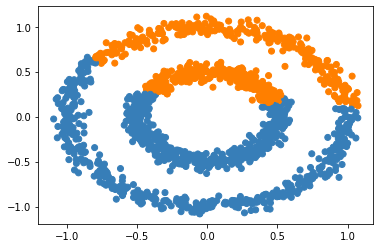

In [8]:
X = noisy_circles[0]
Y = noisy_circles[1]
alg = cluster.AgglomerativeClustering()
alg.fit(data)
ypred = alg.labels_
print('#clusters',alg.n_clusters_)
print('cluster assignments per point',alg.labels_)
plt.scatter(X[:, 0], X[:, 1], color=COLORS[ypred])
plt.show()